In [1]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as swav
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plot freq. and phase response
def mfreqz(b, a=1):
    w, h = signal.freqz(b, a)
    h_dB = 20*np.log10(np.abs(h))
    plt.subplot(211)
    plt.plot(w/np.max(w), h_dB)
    plt.ylabel(r'Magnitude (dB)')
    plt.xlabel(r'Normalized frequency $(\times \pi \, rad/sample)$')
    plt.title(r'Frequency response')
    plt.subplot(212)
    h_phase = np.unwrap(np.arctan2(np.imag(h), np.real(h)))
    plt.plot(w/np.max(w), h_phase)
    plt.ylabel(r'Phase (rad)')
    plt.xlabel(r'Normalized frequency $(\times \pi \, rad/sample)$')
    plt.title(r'Phase response')
    plt.subplots_adjust(hspace=0.5)

# plot step and impulse response
def impz(b, a=1):
    L = len(b)
    impulse = np.repeat(0., 1.)
    impulse[0] = 1.
    x = np.arange(0, 1)
    response = signal.lfilter(b, a, impulse)
    plt.subplot(211)
    plt.stem(x, response)
    plt.ylabel(r'Amplitude')
    plt.xlabel(r'n (sampes)')
    plt.title(r'Impulse response')
    plt.subplot(212)
    step = np.cumsum(response)
    plt.stem(x, step)
    plt.ylabel(r'Amplitude')
    plt.xlabel(r'n (samples)')
    plt.title(r'Step response')
    plt.subplots_adjust(hspace=0.5)

# plot filtered and ata
def plot_data(times, filtered, data, filter='Low-pass filter'):
    plt.subplot(211)
    plt.plot(times, data)
    plt.title(r'Original data')
    plt.subplot(212)
    plt.plot(times, filtered)
    plt.title(filter)
    plt.subplots_adjust(hspace=0.5)

In [3]:
sample_rate, data = swav.read('ecg.wav')
times = np.arange(len(data))/sample_rate

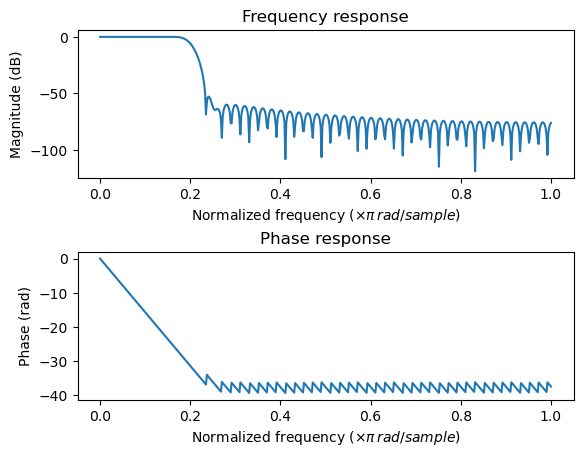

In [4]:
# low-pass filter
numtaps = 101
b = signal.firwin(numtaps=numtaps, cutoff=0.2, window='hamming')

mfreqz(b)
plt.show()

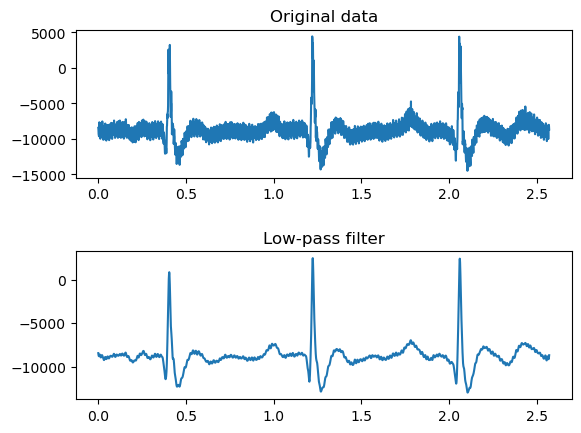

In [5]:
filtered = signal.filtfilt(b, 1, data)

plot_data(times, filtered, data)
plt.show()

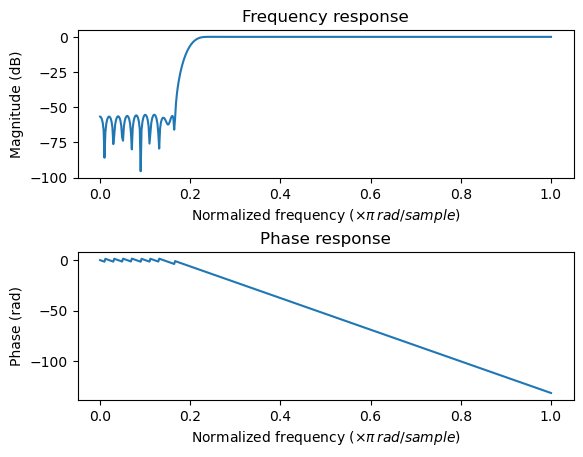

In [6]:
# high-pass filter
b = signal.firwin(numtaps=numtaps, cutoff=0.2, window='hamming', pass_zero=False)

mfreqz(b)
plt.show()

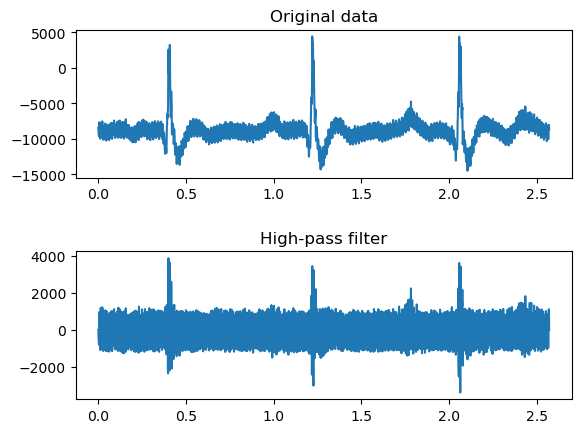

In [7]:
filtered = signal.filtfilt(b, 1, data)

plot_data(times, filtered, data, 'High-pass filter')

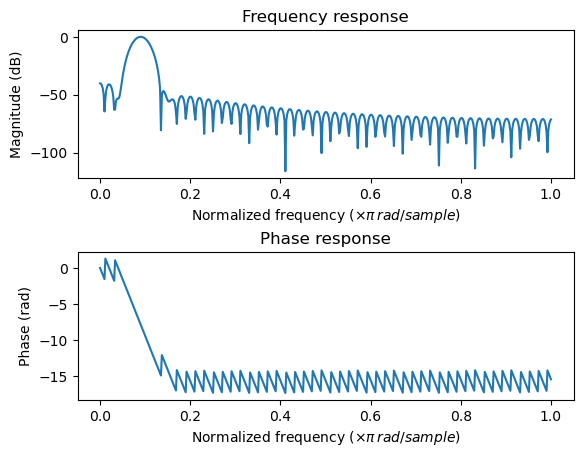

In [8]:
# band-pass filter
b = signal.firwin(numtaps=numtaps, cutoff=[0.08, 0.1], window='hamming', pass_zero=False)

mfreqz(b)
plt.show()

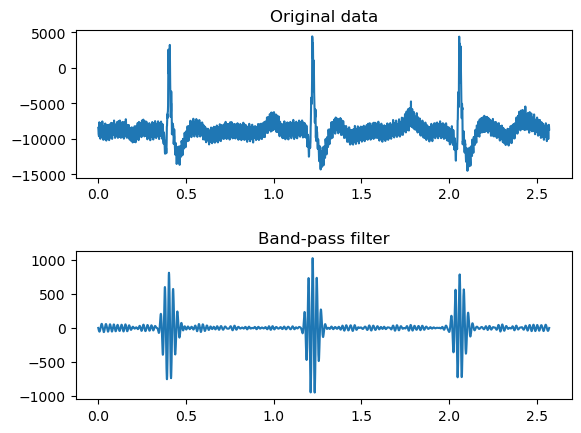

In [9]:
filtered = signal.filtfilt(b, 1, data)

plot_data(times, filtered, data, 'Band-pass filter')

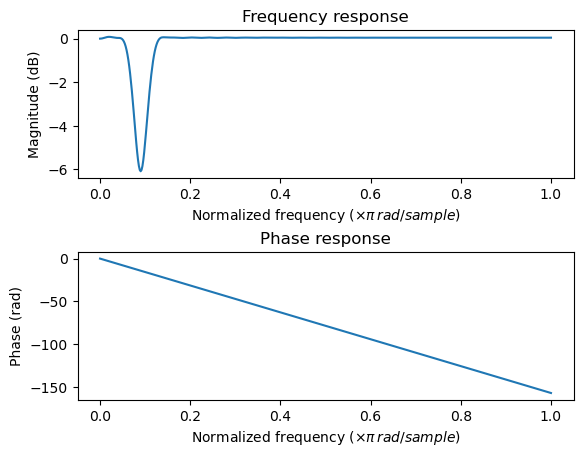

In [10]:
# band-stop filter
b = signal.firwin(numtaps=numtaps, cutoff=[0.08, 0.1])

mfreqz(b)
plt.show()

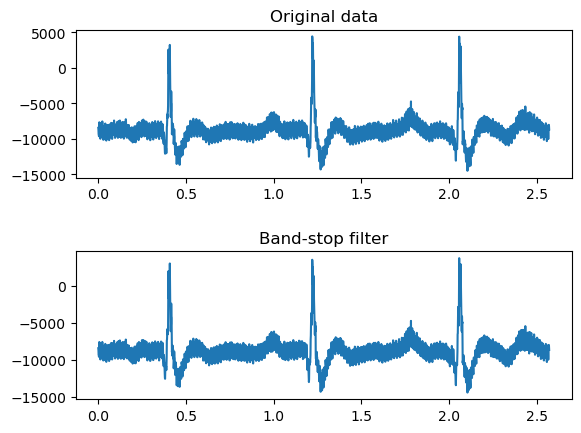

In [11]:
filtered = signal.filtfilt(b, 1, data)

plot_data(times, filtered, data, 'Band-stop filter')